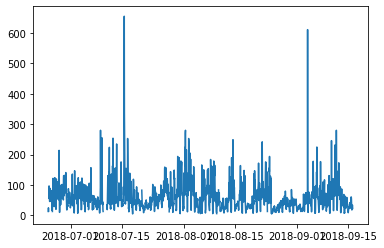

In [4]:
# load JSON
import json
import pandas as pd
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data[48000:50000]

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
plt.plot(df['ds'],df['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


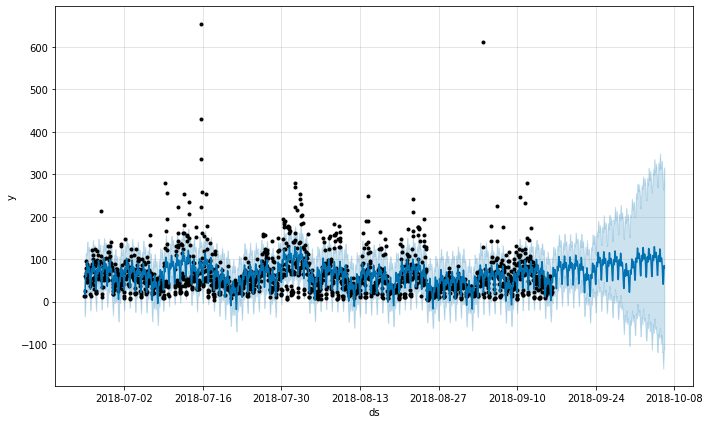

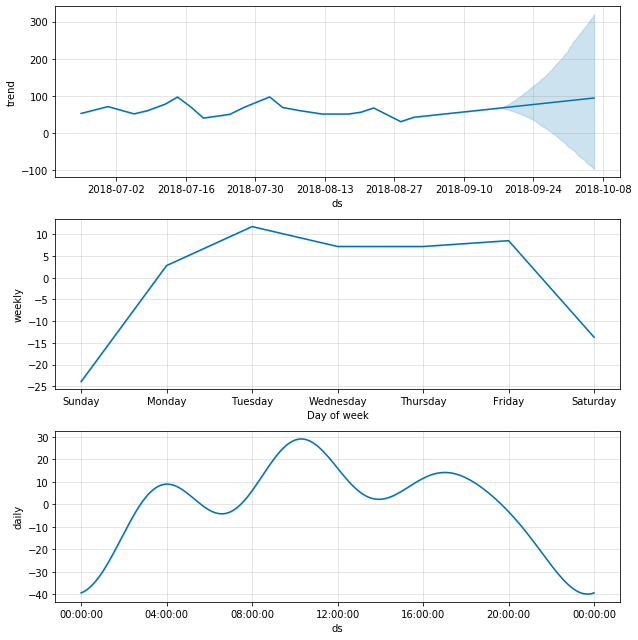

In [11]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.5) #  Increasing scale will make the trend more flexible:
m.fit(df)
future = m.make_future_dataframe(periods=480, freq='H')
forecast = m.predict(future)
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
fig = m.plot(forecast)
components_fig = m.plot_components(forecast)

In [12]:
# PROPHET validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='40 days', period='10 days', horizon ='20 days') # horizon: forecast ; initial: training (default: 3x horizon); 
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-08-07 05:00:00 and 2018-08-27 05:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-07 06:00:00,61.504500,13.058369,116.261160,68.0,2018-08-07 05:00:00
1,2018-08-07 07:00:00,56.622935,7.623824,107.851040,87.0,2018-08-07 05:00:00
2,2018-08-07 08:00:00,61.057387,7.320944,112.648801,82.0,2018-08-07 05:00:00
3,2018-08-07 09:00:00,70.979002,17.739468,120.416010,99.0,2018-08-07 05:00:00
4,2018-08-07 10:00:00,78.205015,26.434681,129.723372,90.0,2018-08-07 05:00:00


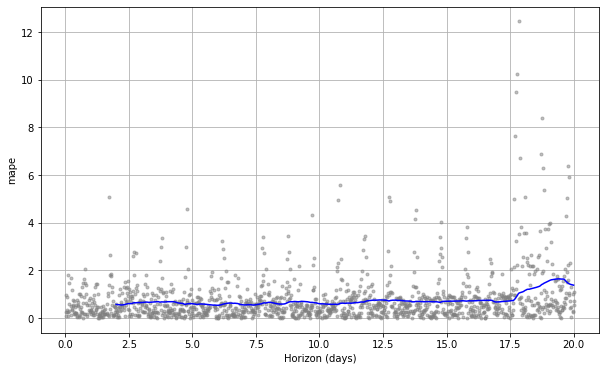

In [10]:
# Performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

# mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE)
# computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff).
# By default, 10% of the predictions in each window (can be changed) 
# high rollingwindow --> smoother average curve 

# Visualize cross-validation
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [28]:
# Percentage errors
mape = 100*sum(abs( (df_cv.yhat - df_cv.y) / df_cv.y) ) / len(df_cv) # MAPE
smape = 100*sum( abs(df_cv.yhat - df_cv.y) / (abs(df_cv.yhat) + abs(df_cv.y)) ) /len(df_cv) / 2 # SMAPE
print('MAPE = ' + str(mape) + '%')
print('SMAPE = ' + str(smape) + '%')

MAPE = 76.73991823840684%
SMAPE = 17.8742053900876%


In [7]:
#import pickle
#pkl_path = "franklin-d-roosevelt/PM10_m.pkl"
#with open(pkl_path, "wb") as f:
#    # Pickle the 'Prophet' model using the highest protocol available.
#    pickle.dump(m, f)

## save the dataframe
#forecast.to_pickle("franklin-d-roosevelt/PM10_forecast.pkl")
#print("*** Data Saved ***")

*** Data Saved ***
